# Problem Statement & Data Description

   This file describes the contents of the heart-disease directory.

   This directory contains 1 database concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   following location:

     1. Cleveland Clinic Foundation (cleveland.data)

   **Digital Citizens**
   
   **August 09, 2019**


1. **Title**: Heart Disease Databases

2. **Source Information**:
   (a) Creators: 
       1. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
             Robert Detrano, M.D., Ph.D.

3. **Relevant Information**:
     This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is the only one that has been used by ML researchers to 
     this date. The "goal" field refers to the presence of heart disease
     in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply
     attempting to distinguish presence (values 1,2,3,4) from absence (value
     0).  
   
     The names and social security numbers of the patients were recently 
     removed from the database, replaced with dummy values.

     One file has been "processed", that one containing the Cleveland 
     database.
4. **Number of Instances:** 
        Database:    # of instances:
          Cleveland: 303

5. **Number of Attributes: 76 (including the predicted attribute)**

6. **Features Information:**
    It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

 - **age**: The person's age in years
 - **sex**: The person's sex (1 = male, 0 = female)
 - **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
 - **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
 - **chol:** The person's cholesterol measurement in mg/dl
 - **fbs:** The person's fasting blood pressur (> 120 mg/dl, 1 = true; 0 = false) 
 - **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
 - **thalach:** The person's maximum heart rate achieved
 - **exang:** Exercise induced angina (1 = yes; 0 = no)
 - **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
 - **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
 - **ca:** The number of major vessels (0-3)
 - **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
 - **target:** Heart disease (0 = no, 1 = yes)

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) I'm going to take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124), ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests).

Looking at information of heart disease risk factors led me to the following: **high cholesterol, high blood pressure, diabetes, weight, family history, air pollution, and smoking** [3](https://www.bhf.org.uk/informationsupport/risk-factors). According to another source [4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack), the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that **thalassemia**, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

I can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the *more* major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, I would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

7. **Missing Attribute Values**: Distinguished with value -9.0. (Have to be treated)

8. **Class Distribution**:
        Database:      0   1   2   3   4 Total
          Cleveland: 164  55  36  35  13   303
          

# Data Preprocessing

In [863]:
!pip install eli5

In [864]:
# Importing the modules
import numpy as np # Linear Algebra
import pandas as pd # Dealing with DataFrames

import seaborn as sns # Advanced plotting 

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn import model_selection

from sklearn.model_selection import KFold

import itertools

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree

from IPython.display import Image


from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz #plot tree

from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

from sklearn.model_selection import train_test_split #for data splitting


import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

!pip install shap
import shap #for SHAP values

!pip install pdpbox
from pdpbox import pdp, info_plots #for partial plots

np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

from statsmodels.formula.api import ols

^C
^C


## Defining Functions for future use

In [869]:
# To give more meaning to integer labes 0,1,...

attribute_name = ''

def convert_integral_labels_into_meaningful_labels(label):
    if (attribute_name == 'sex') :
        if (label == 1):
            return "male"
        else:
            return "female"
    elif (attribute_name == 'chest_pain_type') :
        if (label == 1):
            return "typical-angina"
        elif (label == 2):
            return "atypical-angina"
        elif (label == 3):
            return "non-anginal_pain"
        else:
            return "asymptomatic"
    elif (attribute_name == 'fasting_blood_pressure') :
        if (label == 1):
            return ">120-mg/dl"
        else:
            return "<=120-mg/dl"
    elif (attribute_name == 'rest_ecg') :
        if (label == 0):
            return "normal"
        elif (label == 1):
            return "ST-T wave abnormality"
        else:
            return 'left ventricular hypertrophy'
    elif (attribute_name == 'exercise_induced_angina') :
        if (label == 1):
            
            return "yes"
        else:
            return "false"
    elif (attribute_name == 'st_slope') :
        if (label == 1):
            return "unsloping"
        elif (label == 2):
            return "flat"
        else:
            return "downsloping"
    elif (attribute_name == "thalassemia"):
        if ((label == 0) | (label == 1)):
            return "normal"
        else:
            return "defect"
    else:
        return label


def lcm_of_two_numbers(x, y):
    """This function takes two integers and returns the Lowest Common Multiple."""
#     choose the greater number
    if x > y :
        greater = x
    else:
        greater = y
    
    while(True):
        if((greater %x == 0) & (greater %y == 0)):
            lcm = greater
            break
        else:
            greater+= 1
    return lcm

In [870]:
# Loading the dataset
dset_heart = pd.read_csv('./input/heart_cleveland.csv')

In [871]:
# Assigning meaningful names to the attributes
dset_heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_pressure', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [872]:
# Heading towards data
dset_heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [873]:
#  How the data looks like?
dset_heart.shape

(303, 14)

In [874]:
# Identifying null values as  Missing Attribute Values are distinguished with value -9.0 in the dataset
for column_name in dset_heart.columns:
    dset_heart[column_name].replace(-9.0, np.nan)

In [875]:
# Are there any missing values?
dset_heart.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_pressure     0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [876]:
# info of each Feature
dset_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_pressure     303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [877]:
# Segregating Categorical to convert them into 'object' type
categorical_features = "sex, chest_pain_type, fasting_blood_pressure, rest_ecg, exercise_induced_angina, st_slope, num_major_vessels, thalassemia".split(", ")

In [878]:
# Changing inegral type features based on categories to 'object' type
# Converting each value of such feature to 'object' type

for feature_name in categorical_features:
    attribute_name = feature_name
    dset_heart[feature_name] = dset_heart[feature_name].astype(dtype = 'object', errors = 'raise')
    if(feature_name == 'sex'):
        dset_heart[feature_name] = dset_heart[feature_name].apply(convert_integral_labels_into_meaningful_labels)

In [914]:
dset_heart['num_major_vessels'].replace(4, 0, inplace = True)

In [915]:
# Storing a copy for future visualizations
print(dset_heart.num_major_vessels.value_counts())
dset_heart_copy = dset_heart.copy()

0    180
1     65
2     38
3     20
Name: num_major_vessels, dtype: int64


In [916]:
# Changing inegral type features based on categories to 'object' type
# Converting each value of such feature to 'object' type

for feature_name in categorical_features:
    attribute_name = feature_name
    dset_heart[feature_name] = dset_heart[feature_name].astype(dtype = 'object', errors = 'raise')
    if(feature_name != 'sex'):
        dset_heart[feature_name] = dset_heart[feature_name].apply(convert_integral_labels_into_meaningful_labels)

In [917]:
# does info about each feature cheats us again?
dset_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null object
chest_pain_type            303 non-null object
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_pressure     303 non-null object
rest_ecg                   303 non-null object
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null object
st_depression              303 non-null float64
st_slope                   303 non-null object
num_major_vessels          303 non-null int64
thalassemia                303 non-null object
target                     303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 24.9+ KB


In [893]:
#  Checking if the values are also converted to str
dset_heart.sample(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_pressure,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
56,48,male,asymptomatic,122,222,<=120-mg/dl,normal,186,false,0.0,flat,0,defect,1
282,59,male,atypical-angina,126,218,>120-mg/dl,ST-T wave abnormality,134,false,2.2,unsloping,1,normal,0
272,67,male,asymptomatic,120,237,<=120-mg/dl,ST-T wave abnormality,71,false,1.0,unsloping,0,defect,0
240,70,male,atypical-angina,160,269,<=120-mg/dl,ST-T wave abnormality,112,yes,2.9,unsloping,1,defect,0
265,66,male,asymptomatic,112,212,<=120-mg/dl,normal,132,yes,0.1,flat,1,defect,0


# Data Exploration

In [918]:
# Describing the data
dset_heart.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.663366,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.934375,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,1.000000


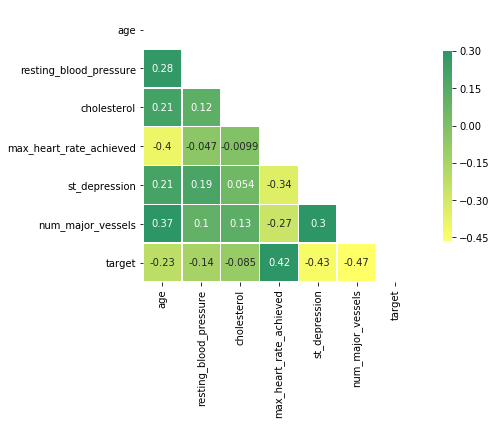

In [919]:
# Checking the correlation
plt.figure(figsize=(10,5))
sns.heatmap(data = dset_heart.corr(), annot = True,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, mask = mask)


## Inference
    * The Pearson correlation coefficient, r, can take a range of values from +1 to -1. A value of 0 indicates that there is no association between the two variables. A value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable. Here, we can see the maximum correlation value is approximately lies between -.5 and .5 which means none of the variables have strong correlation

    * maximum_HR_achieved is inversely (medium strong) related with age. **That is, the older the person gets, the lower the maximum heart rate is likely to be achieved**
    
    * The more is ST depression or oldpeak, the more is the chance that the person is not suffering from heart disease

male      207
female     96
Name: sex, dtype: int64



target    0   1
sex            
female   24  72
male    114  93


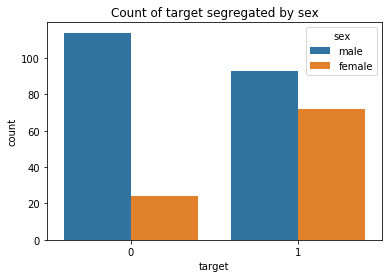

In [896]:
print(dset_heart['sex'].value_counts(), end = "\n\n\n\n")

ct = pd.crosstab(dset_heart['sex'], dset_heart['target'])
print(ct)

sns.countplot(x = 'target', hue = 'sex', data = dset_heart)
plt.title("Count of target segregated by sex")
plt.show()

In [920]:
# Manual Calculations for the making the base equal for male and female because it'll be wrong to compare them with differnt base
lcm_ = lcm_of_two_numbers(96, 207)

base_multiplier_for_females = lcm_/96
base_multiplier_for_males = lcm_/207

females_with_target_1_after_base_change = 0.75*lcm_
males_with_target_1_after_base_change = (114/207)* lcm_

females_with_target_1_after_base_change/males_with_target_1_after_base_change

1.361842105263158

## Inference
* **36% more females when compared to men are more likey to suffer from heart disease**
* 75% of the females are likely to suffer from heart disease
* less than 45% of the men are likely to suffer from heart disease

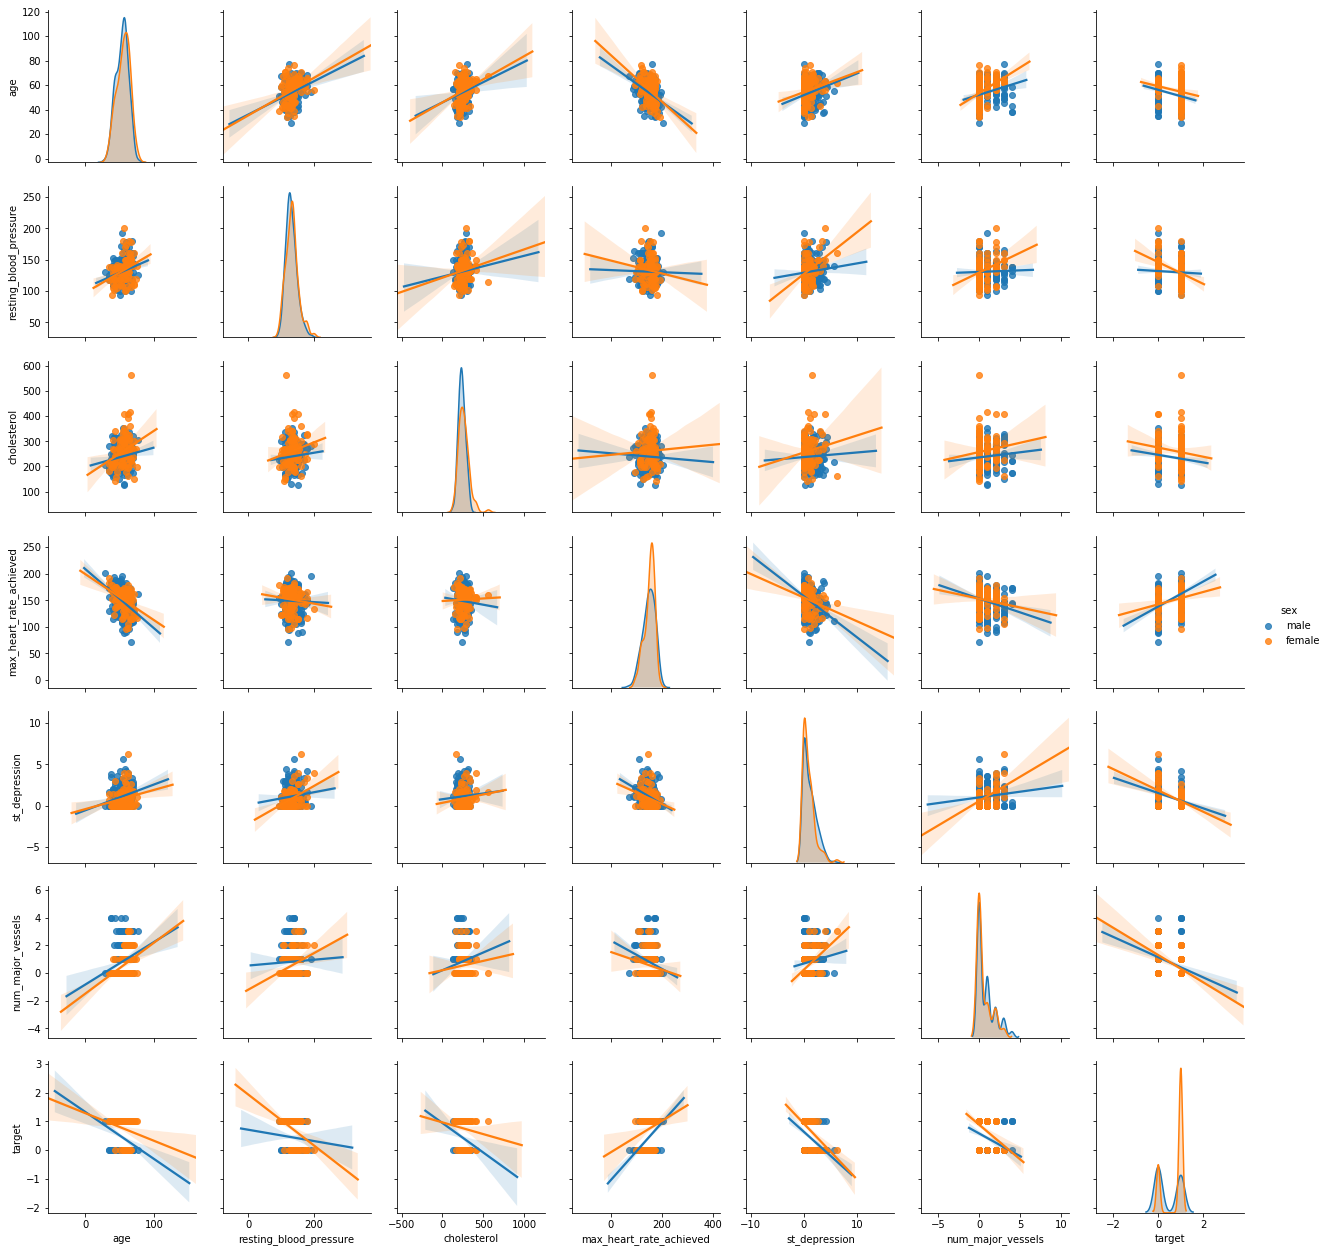

In [898]:
sns.pairplot(data = dset_heart, hue = 'sex', diag_kind = 'kde', kind = 'reg')

### Inferences from the above pairplot
* There is a more likely chance of a Female suffering from  heart disease than a Male 

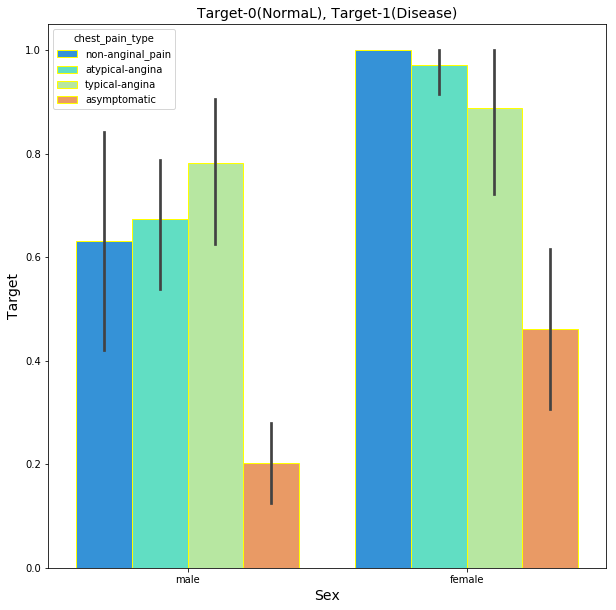

In [899]:
plt.figure(figsize=(10,10))
g=sns.barplot(dset_heart["sex"],dset_heart["target"],hue=dset_heart["chest_pain_type"],palette="rainbow",edgecolor='yellow')
plt.title("Target-0(NormaL), Target-1(Disease)",fontsize=14)
plt.xlabel("Sex",fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.show()

### Inferences
* **Females are guaranteed to have a Heart Disease in case of Non-Anginal pain**
* Any kind of chest pain in Females should not be neglected and they must book a visit to a doctor.

    **Since, this dataset is very small, so the above statements is far from law of large numbers**

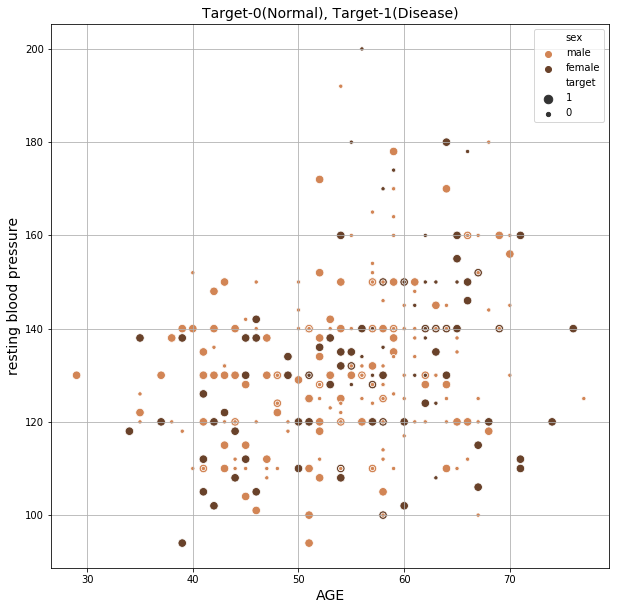

In [900]:
plt.figure(figsize=(10,10))
g=sns.scatterplot(dset_heart["age"],dset_heart["resting_blood_pressure"],hue=dset_heart["sex"],size=dset_heart["target"],size_order=[1,0],palette="copper_r",s=400)
#g=sns.scatterplot(Data["age"],Data["chol"],hue=Data["target"],size=Data["sex"],palette="copper_r",ax=ax[1],s=200)
plt.title("Target-0(Normal), Target-1(Disease)",fontsize=14)
plt.xlabel("AGE",fontsize=14)
plt.ylabel("resting blood pressure",fontsize=14)
plt.grid(True)
plt.show()

In [901]:
m1 = ols(formula = "target~age+resting_blood_pressure", data = dset_heart).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     9.254
Date:                Mon, 19 Aug 2019   Prob (F-statistic):           0.000126
Time:                        04:41:23   Log-Likelihood:                -209.64
No. Observations:                 303   AIC:                             425.3
Df Residuals:                     300   BIC:                             436.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.4764      0.240      6.151      0.000       1.004       1.949
age                       -0.0110      0.003     -3.438      0.001      -0.017      -0.005
resting_blood_pressure    -0.0025      0.002     -1.523      0.129      -0.006       0.001
==============================================================================
Omnibus:                     1813.616   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.181
Skew:                          -0.144   Prob(JB):                     3.10e-09
Kurtosis:                       1.262   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Inference
* Analyzing the patient with respect to blood pressure and age would be a bad criteria to judge the patient for having Heart Disease or not. Also, they doesn't pass statistical significance

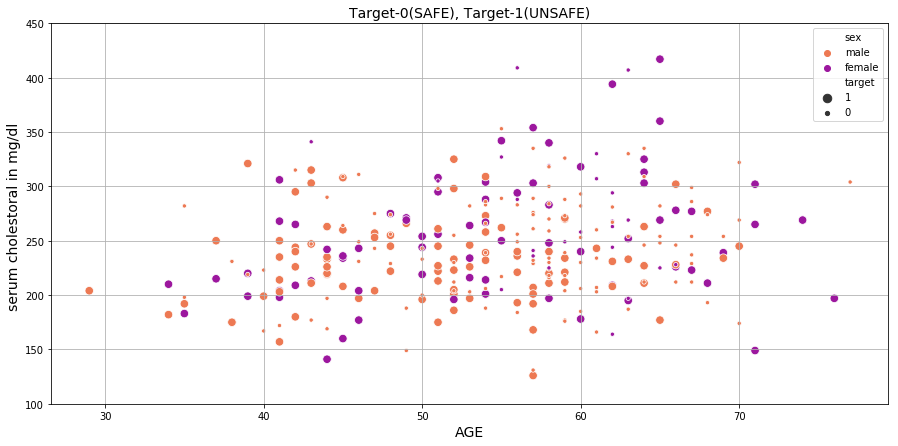

In [902]:
plt.figure(figsize=(15, 7))
g=sns.scatterplot(dset_heart["age"],dset_heart["cholesterol"],hue=dset_heart["sex"],size=dset_heart["target"],palette="plasma_r",size_order=[1,0],s=800)
plt.title("Target-0(SAFE), Target-1(UNSAFE)",fontsize=14)
plt.xlabel("AGE",fontsize=14)
plt.ylabel("serum cholestoral in mg/dl ",fontsize=14)
plt.ylim([100,450])
plt.grid(True)
plt.show()

### Inferences
* For Age below 50, Females have high Chances of Heart Disease even for Cholesterol level below 190.
* For Age above 70, Females are assured to have a Heart Disease where as Males assured not to have it.
* Men must maintain their health after 40
* **Therefore, The Data are contradicting the statement of health.org (Given in the description stage) that Men have a greater risk of heart attack than women do, and men have attacks earlier in life.**

In [903]:
# Getting the number of males and females before 50 with Heart Disease for Cholesterol level below 190.
print(dset_heart.groupby(dset_heart[(dset_heart['age'] >= 40)  & (dset_heart['age'] <= dset_heart['age'].max()) ]['sex'])['target'].sum())
print(dset_heart.groupby(dset_heart[(dset_heart['age'] >= 40)  & (dset_heart['age'] <= dset_heart['age'].max()) ]['sex'])['target'].count())

sex
female    67
male      86
Name: target, dtype: int64
sex
female     91
male      196
Name: target, dtype: int64


<Figure size 3600x3600 with 0 Axes>

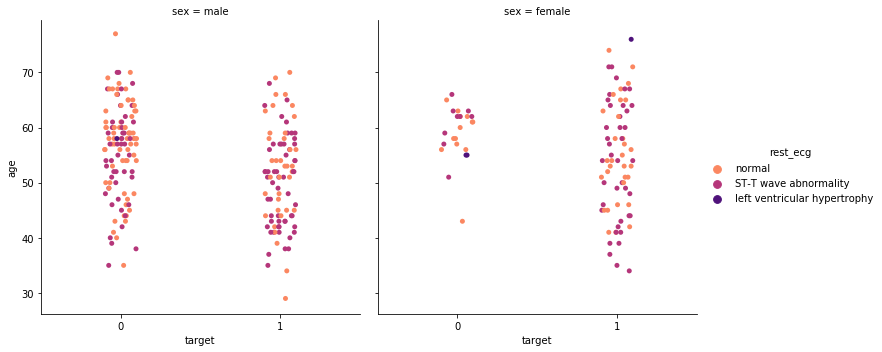

In [904]:
plt.figure(figsize=(50,50))
g=sns.catplot("target","age",col="sex",hue="rest_ecg",data=dset_heart,palette="magma_r")
#plt.title("Target-0(SAFE), Target-1(UNSAFE)",fontsize=14)
#plt.xlabel("AGE",fontsize=14)
#plt.ylabel("Target",fontsize=14)
plt.show()

### Inferences
* Patients showing probable or definite left ventricular hypertrophy are not confirmed to suffer from Heart Disease.
* Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) would be a bad criteria to judge the Presence of Heart Disease, the same is also in case of normal ST-T wave.

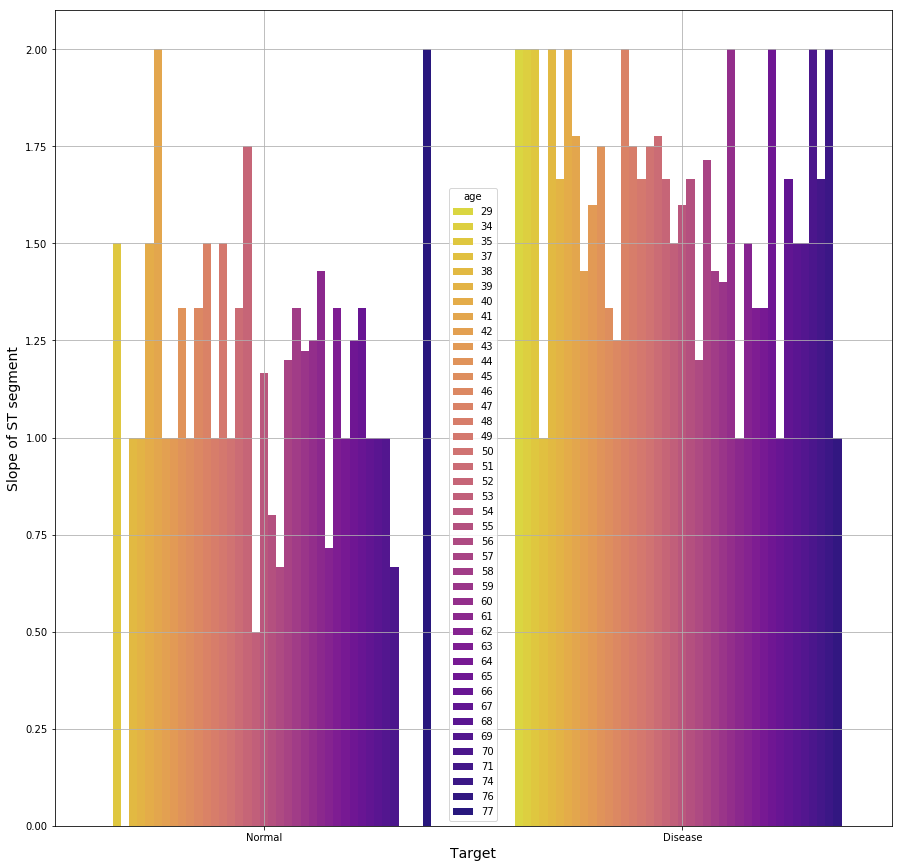

In [906]:
plt.figure(figsize=(15,15))
g=sns.barplot("target","st_slope",hue="age",data=dset_heart_copy,palette="plasma_r",errwidth =0)
plt.xlabel("Target",fontsize=14)
plt.ylabel("Slope of ST segment",fontsize=14)
plt.xticks(np.arange(2),["Normal","Disease"])
plt.grid(True)
plt.show()

### Inferences
* If The slope of the peak exercise ST segment is 1.00 or below then the patient could be assured safe from heart disease for any age group.
* If The slope of the peak exercise ST segment is 1.50 or above then the patient have very high chances of having a heart disease irrespective of any age.
* Slope of the S T segment could be used as a strong parameter to judge if a patient is suffering from Heart Disease or not. It could also be used along with Cholesterol level to judge if a patient could have Heart Disease or not after the age of 50.

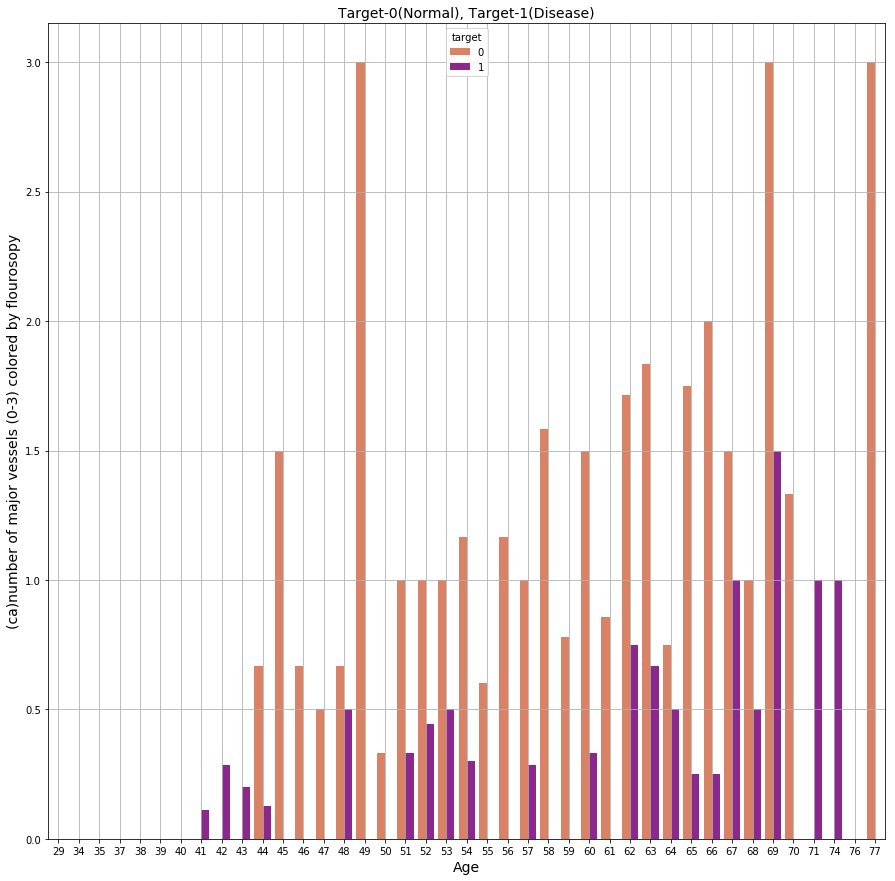

In [921]:
plt.figure(figsize=(15,15))
sns.barplot("age","num_major_vessels",hue="target",data = dset_heart_copy,palette="plasma_r",errwidth =0)
plt.title("Target-0(Normal), Target-1(Disease)",fontsize=14)
plt.xlabel("Age",fontsize=14)
plt.ylabel("(ca)number of major vessels (0-3) colored by flourosopy",fontsize=14)
plt.grid(True)
plt.show()

### Inferences
* If the Value of ca is 1 or more then there is high chance of not having a heart disease.
* For patients below age of 65 this is a good parameter to judge if patient have heart disease or not

In [1042]:
# Loading the dataset
dset_heart = pd.read_csv('./input/heart_cleveland.csv')

# Assigning meaningful names to the attributes
dset_heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_pressure', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Identifying null values as  Missing Attribute Values are distinguished with value -9.0 in the dataset
for column_name in dset_heart.columns:
    dset_heart[column_name].replace(-9.0, np.nan)



# Changing inegral type features based on categories to 'object' type
# Converting each value of such feature to 'object' type

for feature_name in categorical_features:
    attribute_name = feature_name
    dset_heart[feature_name] = dset_heart[feature_name].astype(dtype = 'object', errors = 'raise')
    dset_heart[feature_name] = dset_heart[feature_name].apply(convert_integral_labels_into_meaningful_labels)


For the categorical varibles, we need to create dummy variables. I'm also going to drop the first category of each. For example, rather than having 'male' and 'female', we'll have 'male' with values of 0 or 1 (1 being male, and 0 therefore being female).

In [1043]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()

In [1044]:
# Creating the dummies by dropping the first
dset_heart_dummies = pd.get_dummies(dset_heart, drop_first=True)

In [1045]:
dset_heart_dummies['age'] = pd.Series(sc1.fit_transform(dset_heart_dummies)[:,0])
dset_heart_dummies['resting_blood_pressure'] = pd.Series(sc1.fit_transform(dset_heart_dummies)[:,1])
dset_heart_dummies['cholesterol'] = pd.Series(sc1.fit_transform(dset_heart_dummies)[:,2])
dset_heart_dummies['max_heart_rate_achieved'] = pd.Series(sc1.fit_transform(dset_heart_dummies)[:,3])
dset_heart_dummies['st_depression'] = pd.Series(sc1.fit_transform(dset_heart_dummies)[:,0])

In [1046]:
dset_heart_dummies.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical-angina,chest_pain_type_non-anginal_pain,chest_pain_type_typical-angina,fasting_blood_pressure_>120-mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_unsloping,thalassemia_normal
0,0.952197,0.763956,-0.256334,0.015443,0.952197,0,1,1,0,1,0,1,0,1,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,-1.915313,0,1,1,1,0,0,0,0,0,0,0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,-1.474158,0,1,0,0,0,1,0,0,1,0,1,0,0
3,0.180175,-0.663867,-0.198357,1.239897,0.180175,0,1,1,0,0,1,0,0,0,0,1,0,0
4,0.290464,-0.663867,2.082050,0.583939,0.290464,0,1,0,0,0,0,0,0,0,1,1,0,0


In [1047]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(dset_heart_dummies.drop('target', 1), \
                                                    dset_heart_dummies['target'], test_size = .33, random_state=5) #split the data

# Building models

In [1048]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [1049]:
# Logistic
lr_model = LogisticRegression(random_state=42)

In [1050]:
#  Fully grown decision Tree
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

In [1052]:
# Boostrap Sampled Random Forest : with the hope of controlling the bias errors and variance errors
rf_model_without_best_params = RandomForestClassifier(criterion = 'entropy', random_state=42 )

In [1053]:
from sklearn.model_selection import RandomizedSearchCV

In [1054]:
rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,52),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False],
                 
                 }

In [1058]:
m_r = RandomizedSearchCV(param_distributions=rf_param_grid, 
                                    estimator = rf_model, scoring = "f1_weighted", 
                                    verbose = 0, n_iter = 100, cv = 5)

In [1059]:
m_r.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': [4, 6, 8, 10], 'n_estimators': range(1, 52), 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_split': [2, 3, 10, 20], 'min_samples_leaf': [1, 3, 10, 18], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1_weighted', verbose=0)

In [1060]:
#  Getting the best params for random forest
m_r.best_params_

{'n_estimators': 43,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [1061]:
best_params_ = list(m_r.best_params_.values())

In [1063]:
# Boostrap Sampled Random Forest : with the hope of controlling the bias errors and variance errors
rf_model = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=best_params_[0], \
                                  min_samples_split= best_params_[1], min_samples_leaf= best_params_[2]\
                                 , max_features= best_params_[3], max_depth=best_params_[4],\
                                 bootstrap=False)

In [1064]:
bg_model = BaggingClassifier(base_estimator=dt_model, n_estimators=51, random_state=42)
boost_model_bg = AdaBoostClassifier(base_estimator=bg_model, n_estimators=51, random_state=42)
boost_model_rf = AdaBoostClassifier(base_estimator=rf_model, n_estimators=51, random_state=42)
boost_grad = GradientBoostingClassifier(verbose = 0, random_state= 42, n_estimators= 51)
nb_model = GaussianNB()

In [1065]:
models = []
models.append(('Logistic', lr_model))
models.append(('DecisionTree', dt_model))
models.append(('RandomForest', rf_model))
models.append(('Bagging', bg_model))
models.append(('ADA Boost Bag', boost_model_bg))
models.append(('ADA Boost RF', boost_model_rf))
models.append(('Naive Baye\'s', nb_model))
models.append(('voting', voting_model))
models.append(('Grad', boost_grad))




### perform k-fold on all the models

In [1066]:
import sklearn.model_selection as ms

In [1067]:
X_train.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'sex_male', 'chest_pain_type_atypical-angina',
       'chest_pain_type_non-anginal_pain', 'chest_pain_type_typical-angina',
       'fasting_blood_pressure_>120-mg/dl',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_unsloping',
       'thalassemia_normal'],
      dtype='object')

In [1068]:
dset_heart_dummies.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical-angina,chest_pain_type_non-anginal_pain,chest_pain_type_typical-angina,fasting_blood_pressure_>120-mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_unsloping,thalassemia_normal
0,0.952197,0.763956,-0.256334,0.015443,0.952197,0,1,1,0,1,0,1,0,1,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,-1.915313,0,1,1,1,0,0,0,0,0,0,0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,-1.474158,0,1,0,0,0,1,0,0,1,0,1,0,0
3,0.180175,-0.663867,-0.198357,1.239897,0.180175,0,1,1,0,0,1,0,0,0,0,1,0,0
4,0.290464,-0.663867,2.082050,0.583939,0.290464,0,1,0,0,0,0,0,0,0,1,1,0,0


In [1069]:
X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical-angina,chest_pain_type_non-anginal_pain,chest_pain_type_typical-angina,fasting_blood_pressure_>120-mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_unsloping,thalassemia_normal
273,0.400752,-1.806125,-0.237008,0.277826,0.400752,1,1,0,0,0,0,0,0,0,1,0,0
45,-0.260980,-0.663867,1.521611,0.977514,-0.260980,0,1,0,0,1,0,0,0,0,1,0,0
182,0.731619,-0.092738,1.618238,0.846322,0.731619,0,0,0,0,0,0,0,1,0,1,0,0
107,-1.033002,0.364165,-0.198357,0.102904,-1.033002,0,0,0,0,0,0,0,1,1,0,1,0
174,0.621330,-0.092738,-0.778122,-0.771706,0.621330,2,1,0,0,0,0,0,1,1,0,1,0


In [1070]:
#  Evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in models :
    kfold = ms.KFold(n_splits= 5)
    cv_results = ms.cross_val_score(model, dset_heart_dummies.drop(['target'], axis = 1 ), dset_heart_dummies['target'], \
                                    scoring = scoring, cv = kfold)
    names.append(name)
    results.append(cv_results)
    msg = "(%s) ----  %s: %f +/- %f" % ('Error Score', name, 1 - np.mean(cv_results), cv_results.var())
    print(msg)
    

(Error Score) ----  Logistic: 0.176282 +/- 0.002419
(Error Score) ----  DecisionTree: 0.234994 +/- 0.001214
(Error Score) ----  RandomForest: 0.201507 +/- 0.002498
(Error Score) ----  Bagging: 0.179184 +/- 0.003322
(Error Score) ----  ADA Boost Bag: 0.198463 +/- 0.001707
(Error Score) ----  ADA Boost RF: 0.196907 +/- 0.002965
(Error Score) ----  Naive Baye's: 0.167665 +/- 0.004516
(Error Score) ----  voting: 0.188387 +/- 0.001497
(Error Score) ----  Grad: 0.209700 +/- 0.003557


In [1014]:
pd.DataFrame(data = results, index = "Logistic, DT, RF, Bagging, Ada_Bag, Ada_Rf, NB, Voting, Grad".split(', ')).T

,Logistic,DT,RF,Bagging,Ada_Bag,Ada_Rf,NB,Voting,Grad
0,0.872727,0.830189,0.892857,0.851852,0.872727,0.851852,0.807692,0.851852,0.830189
1,0.912281,0.760000,0.830189,0.830189,0.851852,0.784314,0.872727,0.830189,0.830189
2,0.931034,0.830189,0.892857,0.830189,0.830189,0.872727,0.949153,0.830189,0.830189
3,0.846154,0.723404,0.775510,0.723404,0.695652,0.775510,0.800000,0.723404,0.775510
4,0.846154,0.775510,0.867925,0.823529,0.888889,0.846154,0.800000,0.750000,0.867925
5,0.800000,0.735747,0.834260,0.767964,0.800000,0.767964,0.764850,0.767964,0.764850
6,0.800000,0.775510,0.800000,0.800000,0.800000,0.800000,0.775510,0.800000,0.775510
7,0.823529,0.800000,0.775510,0.846154,0.823529,0.775510,0.867925,0.846154,0.750000
8,0.846154,0.750000,0.775510,0.846154,0.846154,0.846154,0.888889,0.846154,0.846154
9,0.775510,0.775510,0.846154,0.823529,0.800000,0.775510,0.800000,0.846154,0.800000


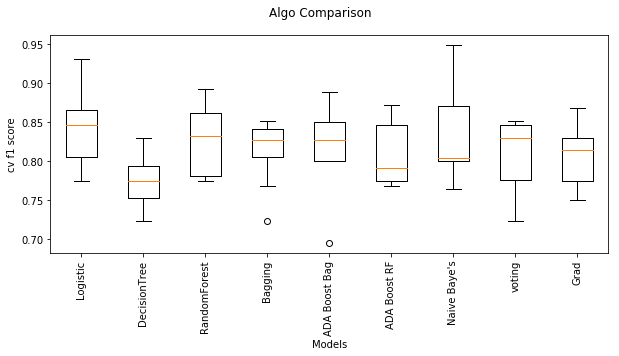

In [1015]:
# Boxplot algo comparison
fig = plt.figure(figsize = (10, 4))
fig.suptitle("Algo Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("cv f1 score")
plt.xlabel("Models")
ax.set_xticklabels(names)
plt.xticks(rotation = 90)
plt.show()

      Iter       Train Loss   Remaining Time 
         1           1.2833            0.25s
         2           1.2049            0.32s
         3           1.1409            0.34s
         4           1.0873            0.36s
         5           1.0387            0.36s
         6           0.9987            0.35s
         7           0.9609            0.35s
         8           0.9285            0.34s
         9           0.9016            0.33s
        10           0.8720            0.32s
        20           0.6455            0.16s
        30           0.5151            0.09s
        40           0.4156            0.04s
        50           0.3489            0.00s


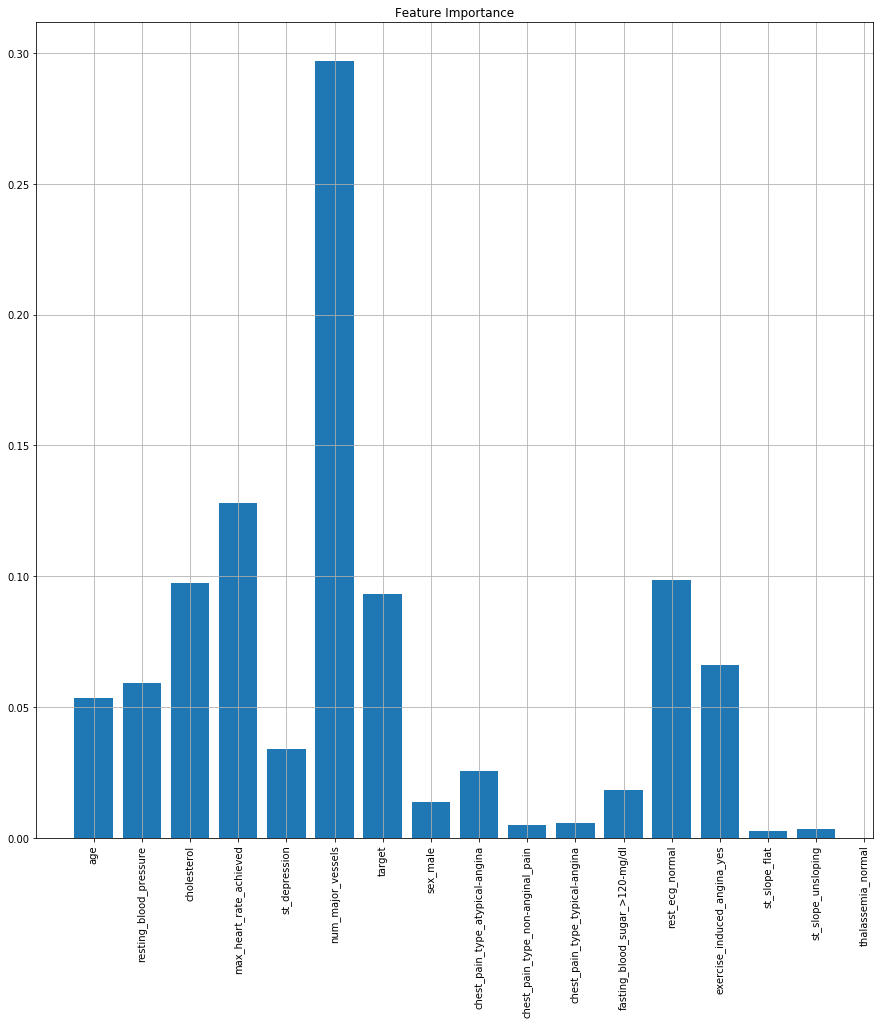

In [855]:
boost_grad.fit(X_train, y_train)
plt.figure(figsize=(15,15))
plt.bar(range(len(boost_grad.feature_importances_)), boost_grad.feature_importances_)
plt.title("Feature Importance")
plt.xticks(np.arange(len(list(dset_heart_dummies.columns))), dset_heart_dummies.columns, rotation = 90)
plt.grid(True)
plt.show()

In [462]:
pd.DataFrame(results, index = "Logistic, DT, FR, Bag, ADA_Bag, ADA_RF, NB".split(', ')).T

,Logistic,DT,FR,Bag,ADA_Bag,ADA_RF,NB
0,0.890511,0.803150,0.865672,0.882353,0.857143,0.865672,0.890511
1,0.821705,0.839695,0.754098,0.821705,0.793651,0.743802,0.830769
2,0.744612,0.744612,0.723069,0.756757,0.791046,0.723178,0.800730
3,0.750000,0.818898,0.739496,0.790323,0.790323,0.780488,0.846154


In [837]:
voting_model = VotingClassifier(estimators= [('NB', nb_model), ('ADA_BAG', boost_model_bg), ('RF', rf_model)])

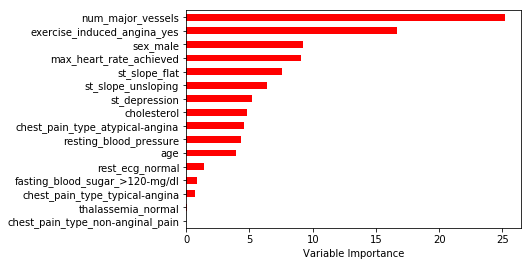

In [836]:
rf_model = RandomForestClassifier(criterion = 'entropy', random_state=42, n_estimators=best_params_[0], \
                                  min_samples_split= best_params_[1], min_samples_leaf= best_params_[2]\
                                 , max_features= best_params_[3], max_depth=best_params_[4],\
                                 bootstrap=False)
rf_model.fit(X_train, y_train)
Importance = pd.DataFrame({'Importance':rf_model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [828]:
voting_model.fit_transform(X_train, y_train)

array([[1, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1,